In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

import numpy as np

plt.rcParams['font.family'] = 'SimSun'

In [2]:
table1 = pd.read_excel('../data/表1-患者列表及临床信息.xlsx')
table2 = pd.read_excel('../data/表2-患者影像信息血肿及水肿的体积及位置.xlsx')
table3 = pd.read_excel('../data/lwj/2c.xlsx')

table_temp = pd.merge(table1, table2, on='ID')

In [3]:
table_d = pd.merge(table_temp, table3, on='ID')

In [4]:
# table_d.to_excel('./excels/table_E3_a_temp.xlsx',index=False)
table_d

,ID,90天mRS,数据集划分,入院首次影像检查流水号_x,年龄,性别,脑出血前mRS评分,高血压病史,卒中病史,糖尿病史,...,NCCT_original_firstorder_MeanAbsoluteDeviation,NCCT_original_firstorder_Mean,NCCT_original_firstorder_Median,NCCT_original_firstorder_Minimum,NCCT_original_firstorder_Range,NCCT_original_firstorder_RobustMeanAbsoluteDeviation,NCCT_original_firstorder_RootMeanSquared,NCCT_original_firstorder_Skewness,NCCT_original_firstorder_Uniformity,NCCT_original_firstorder_Variance
0,sub001,4.0,训练,20161212002136,43,女,0,0,0,0,...,8.247517,53.100174,54.277975,2.630186,88.333203,5.421960,54.182743,-0.680312,0.156607,116.141179
1,sub002,0.0,训练,20160406002131,58,男,0,1,0,0,...,5.767857,37.252825,37.518627,11.670399,54.126259,3.986374,37.958520,-0.176969,0.132046,53.076248
2,sub003,5.0,训练,20160413000006,78,男,0,1,0,0,...,7.659346,35.163065,35.410096,-1.715890,70.139106,5.382112,36.444232,-0.057096,0.128060,91.740851
3,sub004,4.0,训练,20161215001667,70,男,2,1,1,0,...,8.911068,30.191045,30.926762,-20.991359,92.048538,6.191501,32.204819,-0.297133,0.145292,125.651157
4,sub005,3.0,训练,20161222000978,51,男,0,0,0,0,...,9.250453,45.985845,46.492200,-9.889141,96.821808,6.482624,47.428035,-0.227378,0.146488,134.720581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,sub096,4.0,训练,20180802001789,93,女,0,0,0,0,...,7.118580,44.469975,45.627698,-1.353307,75.353316,4.764270,45.427431,-0.852965,0.155848,86.072788
96,sub097,2.0,训练,20181010000767,83,女,0,1,0,0,...,8.006967,49.624525,49.646822,10.589739,69.684072,5.654763,50.616489,-0.047266,0.121547,99.435503
97,sub098,5.0,训练,20180612002507,82,男,0,1,1,1,...,8.462658,35.911280,35.494566,-2.467873,98.855412,5.523299,37.597608,0.432499,0.166861,123.960058
98,sub099,3.0,训练,20180620002296,53,男,0,1,0,0,...,6.006107,41.019959,41.559362,3.177012,66.837891,4.002934,41.752598,-0.318306,0.159415,60.642372


In [5]:
# 获取后31列的列名
shape_features = table_d.columns[-31:].tolist()

# 打印提取的列名
print(shape_features)

['original_shape_Elongation', 'original_shape_Flatness', 'original_shape_LeastAxisLength', 'original_shape_MajorAxisLength', 'original_shape_Maximum2DDiameterColumn', 'original_shape_Maximum2DDiameterRow', 'original_shape_Maximum2DDiameterSlice', 'original_shape_Maximum3DDiameter', 'original_shape_MeshVolume', 'original_shape_MinorAxisLength', 'original_shape_Sphericity', 'original_shape_SurfaceArea', 'original_shape_SurfaceVolumeRatio', 'original_shape_VoxelVolume', 'NCCT_original_firstorder_10Percentile', 'NCCT_original_firstorder_90Percentile', 'NCCT_original_firstorder_Energy', 'NCCT_original_firstorder_Entropy', 'NCCT_original_firstorder_InterquartileRange', 'NCCT_original_firstorder_Kurtosis', 'NCCT_original_firstorder_Maximum', 'NCCT_original_firstorder_MeanAbsoluteDeviation', 'NCCT_original_firstorder_Mean', 'NCCT_original_firstorder_Median', 'NCCT_original_firstorder_Minimum', 'NCCT_original_firstorder_Range', 'NCCT_original_firstorder_RobustMeanAbsoluteDeviation', 'NCCT_origi

In [6]:
_90mRs = table_d['90天mRS']  #Y
features = ['年龄', '高血压病史', '卒中病史', '糖尿病史', '房颤史', '冠心病史', '吸烟史', '饮酒史', 'HM_volume', 'ED_volume', 'HM_ACA_R_Ratio',
            'HM_MCA_R_Ratio', 'HM_PCA_R_Ratio', 'HM_Pons_Medulla_R_Ratio', 'HM_Cerebellum_R_Ratio', 'HM_ACA_L_Ratio',
            'HM_MCA_L_Ratio', 'HM_PCA_L_Ratio', 'HM_Pons_Medulla_L_Ratio', 'HM_Cerebellum_L_Ratio', 'ED_ACA_R_Ratio',
            'ED_MCA_R_Ratio', 'ED_PCA_R_Ratio', 'ED_Pons_Medulla_R_Ratio', 'ED_Cerebellum_R_Ratio', 'ED_ACA_L_Ratio',
            'ED_MCA_L_Ratio', 'ED_PCA_L_Ratio', 'ED_Pons_Medulla_L_Ratio', 'ED_Cerebellum_L_Ratio']
fea = ['90天mRS']
features = features + shape_features + fea

In [7]:
print(features)

['年龄', '高血压病史', '卒中病史', '糖尿病史', '房颤史', '冠心病史', '吸烟史', '饮酒史', 'HM_volume', 'ED_volume', 'HM_ACA_R_Ratio', 'HM_MCA_R_Ratio', 'HM_PCA_R_Ratio', 'HM_Pons_Medulla_R_Ratio', 'HM_Cerebellum_R_Ratio', 'HM_ACA_L_Ratio', 'HM_MCA_L_Ratio', 'HM_PCA_L_Ratio', 'HM_Pons_Medulla_L_Ratio', 'HM_Cerebellum_L_Ratio', 'ED_ACA_R_Ratio', 'ED_MCA_R_Ratio', 'ED_PCA_R_Ratio', 'ED_Pons_Medulla_R_Ratio', 'ED_Cerebellum_R_Ratio', 'ED_ACA_L_Ratio', 'ED_MCA_L_Ratio', 'ED_PCA_L_Ratio', 'ED_Pons_Medulla_L_Ratio', 'ED_Cerebellum_L_Ratio', 'original_shape_Elongation', 'original_shape_Flatness', 'original_shape_LeastAxisLength', 'original_shape_MajorAxisLength', 'original_shape_Maximum2DDiameterColumn', 'original_shape_Maximum2DDiameterRow', 'original_shape_Maximum2DDiameterSlice', 'original_shape_Maximum3DDiameter', 'original_shape_MeshVolume', 'original_shape_MinorAxisLength', 'original_shape_Sphericity', 'original_shape_SurfaceArea', 'original_shape_SurfaceVolumeRatio', 'original_shape_VoxelVolume', 'NCCT_original_fir

In [8]:
table = table_d[features]

# table.to_excel('./excels/Q3_a_X.xlsx',index=False)
table

,年龄,高血压病史,卒中病史,糖尿病史,房颤史,冠心病史,吸烟史,饮酒史,HM_volume,ED_volume,...,NCCT_original_firstorder_Mean,NCCT_original_firstorder_Median,NCCT_original_firstorder_Minimum,NCCT_original_firstorder_Range,NCCT_original_firstorder_RobustMeanAbsoluteDeviation,NCCT_original_firstorder_RootMeanSquared,NCCT_original_firstorder_Skewness,NCCT_original_firstorder_Uniformity,NCCT_original_firstorder_Variance,90天mRS
0,43,0,0,0,0,0,0,0,69714,48919,...,53.100174,54.277975,2.630186,88.333203,5.421960,54.182743,-0.680312,0.156607,116.141179,4.0
1,58,1,0,0,0,0,0,0,47500,23526,...,37.252825,37.518627,11.670399,54.126259,3.986374,37.958520,-0.176969,0.132046,53.076248,0.0
2,78,1,0,0,0,0,0,0,86396,32621,...,35.163065,35.410096,-1.715890,70.139106,5.382112,36.444232,-0.057096,0.128060,91.740851,5.0
3,70,1,1,0,0,0,0,0,45498,22191,...,30.191045,30.926762,-20.991359,92.048538,6.191501,32.204819,-0.297133,0.145292,125.651157,4.0
4,51,0,0,0,0,0,0,0,14832,47392,...,45.985845,46.492200,-9.889141,96.821808,6.482624,47.428035,-0.227378,0.146488,134.720581,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,93,0,0,0,0,0,0,0,9114,5951,...,44.469975,45.627698,-1.353307,75.353316,4.764270,45.427431,-0.852965,0.155848,86.072788,4.0
96,83,1,0,0,0,0,0,0,10806,10227,...,49.624525,49.646822,10.589739,69.684072,5.654763,50.616489,-0.047266,0.121547,99.435503,2.0
97,82,1,1,1,1,1,1,0,188134,39868,...,35.911280,35.494566,-2.467873,98.855412,5.523299,37.597608,0.432499,0.166861,123.960058,5.0
98,53,1,0,0,0,0,0,0,37309,9653,...,41.019959,41.559362,3.177012,66.837891,4.002934,41.752598,-0.318306,0.159415,60.642372,3.0


D:\DevHome\Environment\anaconda\envs\myself_env\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\wwx\AppData\Local\Temp\ipykernel_24068\381455004.py:7: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dmi" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('./figs/Q3/Q3_a_cor.png',dmi=400)
C:\Users\wwx\AppData\Local\Temp\ipykernel_24068\381455004.py:7: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.savefig('./figs/Q3/Q3_a_cor.png',dmi=400)
D:\DevHome\Environment\anaconda\envs\myself_env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


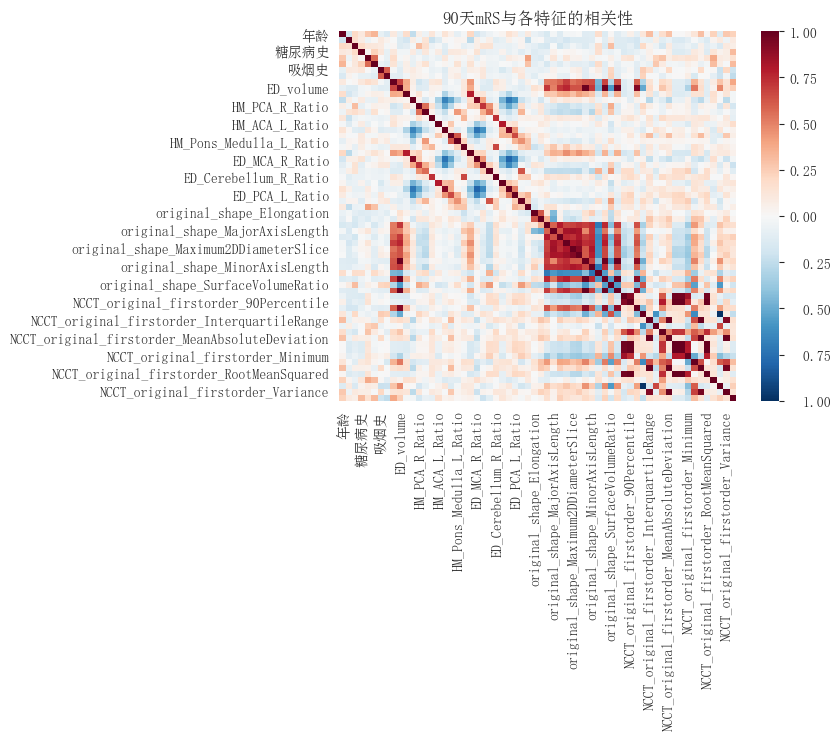

In [9]:
corr_matrix = table.corr() # 默认使用皮尔逊相关系数
corr_matrix['90天mRS']
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(corr_matrix, cmap='RdBu_r', vmin=-1, vmax=1) # 使用红蓝色调，设置最小值和最大值为-1和1
plt.title('90天mRS与各特征的相关性')
plt.savefig('./figs/Q3/Q3_a_cor.png',dmi=400)
plt.show() # 显示图像


In [10]:
import pandas as pd
for feature, corr in corr_matrix['90天mRS'].items(): # 遍历相关系数矩阵的每一列
        print(feature, corr) # 打印出特征和对应相关性值


年龄 0.23356131134009436
高血压病史 0.09008864238635042
卒中病史 0.0676476084218266
糖尿病史 0.31332834082139754
房颤史 0.1556198346206145
冠心病史 0.3131265691541534
吸烟史 -0.2053696452985496
饮酒史 -0.2548849394345527
HM_volume 0.385256804156474
ED_volume 0.24099673305463595
HM_ACA_R_Ratio -0.030975511139461138
HM_MCA_R_Ratio -0.030646622170889645
HM_PCA_R_Ratio -0.17477727298421933
HM_Pons_Medulla_R_Ratio -0.07793250380890893
HM_Cerebellum_R_Ratio -0.092279734599636
HM_ACA_L_Ratio 0.1784359356728696
HM_MCA_L_Ratio 0.04505554740058538
HM_PCA_L_Ratio 0.06756454634800081
HM_Pons_Medulla_L_Ratio 0.012260399914876671
HM_Cerebellum_L_Ratio 0.0315886563828695
ED_ACA_R_Ratio 0.04781112002070967
ED_MCA_R_Ratio -0.02846806664369994
ED_PCA_R_Ratio -0.21496145604612807
ED_Pons_Medulla_R_Ratio -0.11202394727726943
ED_Cerebellum_R_Ratio 0.022097033675488088
ED_ACA_L_Ratio 0.12505619739314322
ED_MCA_L_Ratio 0.06257572236642961
ED_PCA_L_Ratio 0.02679048591284309
ED_Pons_Medulla_L_Ratio -0.01589030862551477
ED_Cerebellum_L_Ra

In [11]:
# 创建相关性阈值
threshold = 0.2

# 找出与ED_volume正相关和负相关绝对值大于0.65的特征
positive_corr_mRS = corr_matrix['90天mRS'][(corr_matrix['90天mRS'] > threshold) | (corr_matrix['90天mRS'] < -threshold)]


# 输出结果
print("与mRS正相关和负相关绝对值大于0.2的特征:")
print(len(positive_corr_mRS))

与mRS正相关和负相关绝对值大于0.2的特征:
18


In [12]:
positive_corr_mRS_fea = np.array(positive_corr_mRS.index)
positive_corr_mRS_fea

array(['年龄', '糖尿病史', '冠心病史', '吸烟史', '饮酒史', 'HM_volume', 'ED_volume',
       'ED_PCA_R_Ratio', 'original_shape_Maximum2DDiameterColumn',
       'original_shape_MeshVolume', 'original_shape_SurfaceArea',
       'original_shape_SurfaceVolumeRatio', 'original_shape_VoxelVolume',
       'NCCT_original_firstorder_Entropy',
       'NCCT_original_firstorder_Minimum',
       'NCCT_original_firstorder_Range',
       'NCCT_original_firstorder_Uniformity', '90天mRS'], dtype=object)

In [13]:
featuress = ['ID','HM_volume', 'ED_volume', 'original_shape_LeastAxisLength', 'original_shape_MajorAxisLength', 'original_shape_Maximum2DDiameterColumn', 'original_shape_Maximum2DDiameterRow', 'original_shape_Maximum2DDiameterSlice', 'original_shape_Maximum3DDiameter', 'original_shape_MeshVolume', 'original_shape_MinorAxisLength', 'original_shape_SurfaceArea', 'original_shape_VoxelVolume', 'NCCT_original_firstorder_Energy','90天mRS']
table = table_d[featuress]
table

,ID,HM_volume,ED_volume,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,original_shape_SurfaceArea,original_shape_VoxelVolume,NCCT_original_firstorder_Energy,90天mRS
0,sub001,69714,48919,28.776261,79.361352,60.016664,68.007353,67.779053,74.148500,16795.208333,60.115094,12328.452469,17136,5.030735e+07,4.0
1,sub002,47500,23526,25.505005,55.711193,57.982756,52.478567,55.758407,63.765194,9128.250000,50.752649,7213.155855,9347,1.346762e+07,0.0
2,sub003,86396,32621,32.302338,78.031463,69.115845,88.836929,70.405966,89.409172,11952.375000,69.434088,10296.788172,12241,1.625828e+07,5.0
3,sub004,45498,22191,22.553405,80.530949,48.373546,57.870545,65.000000,72.945185,8590.833333,36.900531,6706.913313,8789,9.115515e+06,4.0
4,sub005,14832,47392,36.704810,110.528262,102.883429,109.329776,112.805142,118.785521,21773.833333,68.857570,16362.521151,22302,5.016653e+07,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,sub096,9114,5951,17.251933,40.797156,36.055513,40.459857,33.376639,42.426407,1718.875000,27.869528,2018.321313,1830,3.776482e+06,4.0
96,sub097,10806,10227,16.571583,42.099215,34.713110,41.773197,41.194660,43.011626,3044.875000,31.667490,2782.714802,3122,7.998654e+06,2.0
97,sub098,188134,39868,28.036988,116.037899,77.698134,123.422040,96.005208,123.422040,14108.000000,73.607651,12665.452494,14498,2.049408e+07,5.0
98,sub099,37309,9653,17.527187,78.046160,46.065171,56.612719,76.661594,78.651128,2822.083333,44.528260,3688.165052,3008,5.243784e+06,3.0


In [386]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.linear_model import LogisticRegression

In [14]:
input_fea = table_d[['年龄','糖尿病史','冠心病史','吸烟史','饮酒史','HM_volume', 'ED_volume', 'ED_PCA_R_Ratio', 'original_shape_Maximum2DDiameterColumn', 'original_shape_MeshVolume', 'original_shape_SurfaceArea', 'original_shape_SurfaceVolumeRatio', 'original_shape_VoxelVolume', 'NCCT_original_firstorder_Entropy', 'NCCT_original_firstorder_Minimum', 'NCCT_original_firstorder_Range', 'NCCT_original_firstorder_Uniformity', 'NCCT_original_firstorder_Energy']]

# X = pd.get_dummies(input_fea)
# X

,年龄,糖尿病史,冠心病史,吸烟史,饮酒史,HM_volume,ED_volume,ED_PCA_R_Ratio,original_shape_Maximum2DDiameterColumn,original_shape_MeshVolume,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,original_shape_VoxelVolume,NCCT_original_firstorder_Entropy,NCCT_original_firstorder_Minimum,NCCT_original_firstorder_Range,NCCT_original_firstorder_Uniformity,NCCT_original_firstorder_Energy
0,43,0,0,0,0,69714,48919,0.136511,60.016664,16795.208333,12328.452469,0.734046,17136,2.971570,2.630186,88.333203,0.156607,5.030735e+07
1,58,0,0,0,0,47500,23526,0.246876,57.982756,9128.250000,7213.155855,0.790201,9347,3.156185,11.670399,54.126259,0.132046,1.346762e+07
2,78,0,0,0,0,86396,32621,0.075013,69.115845,11952.375000,10296.788172,0.861485,12241,3.183489,-1.715890,70.139106,0.128060,1.625828e+07
3,70,0,0,0,0,45498,22191,0.012483,48.373546,8590.833333,6706.913313,0.780706,8789,3.013699,-20.991359,92.048538,0.145292,9.115515e+06
4,51,0,0,0,0,14832,47392,0.011690,102.883429,21773.833333,16362.521151,0.751476,22302,2.995498,-9.889141,96.821808,0.146488,5.016653e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,93,0,0,0,0,9114,5951,0.000000,36.055513,1718.875000,2018.321313,1.174211,1830,2.961653,-1.353307,75.353316,0.155848,3.776482e+06
96,83,0,0,0,0,10806,10227,0.163978,34.713110,3044.875000,2782.714802,0.913901,3122,3.254812,10.589739,69.684072,0.121547,7.998654e+06
97,82,1,1,1,0,188134,39868,0.177611,77.698134,14108.000000,12665.452494,0.897750,14498,2.883844,-2.467873,98.855412,0.166861,2.049408e+07
98,53,0,0,0,0,37309,9653,0.038019,46.065171,2822.083333,3688.165052,1.306894,3008,2.942184,3.177012,66.837891,0.159415,5.243784e+06


In [23]:
y = table['90天mRS']
y.__class__

pandas.core.series.Series

相关系数:
年龄                                        0.233561
糖尿病史                                      0.313328
冠心病史                                      0.313127
吸烟史                                      -0.205370
饮酒史                                      -0.254885
HM_volume                                 0.385257
ED_volume                                 0.240997
ED_PCA_R_Ratio                           -0.214961
original_shape_Maximum2DDiameterColumn    0.238653
original_shape_MeshVolume                 0.201753
original_shape_SurfaceArea                0.234227
original_shape_SurfaceVolumeRatio        -0.201659
original_shape_VoxelVolume                0.202637
NCCT_original_firstorder_Entropy         -0.247289
NCCT_original_firstorder_Minimum         -0.229103
NCCT_original_firstorder_Range            0.308705
NCCT_original_firstorder_Uniformity       0.240015
NCCT_original_firstorder_Energy           0.173638
dtype: float64


D:\DevHome\Environment\anaconda\envs\myself_env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 21464 (\N{CJK UNIFIED IDEOGRAPH-53D8}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\DevHome\Environment\anaconda\envs\myself_env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\DevHome\Environment\anaconda\envs\myself_env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 31665 (\N{CJK UNIFIED IDEOGRAPH-7BB1}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\DevHome\Environment\anaconda\envs\myself_env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\DevHome\Environment\anaconda\envs\myself_env\lib\site-packages\IPython\core\pylabtools.py:152: Us

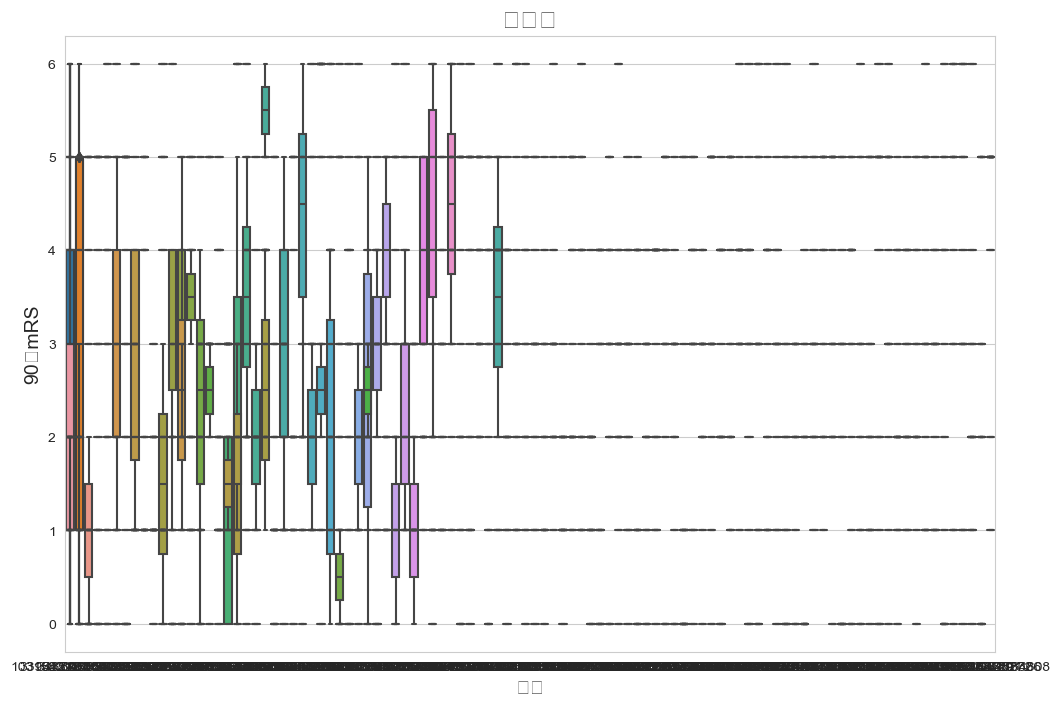

In [25]:
y = y.astype(int)
# 使用corr方法计算input_fea和y之间的相关系数，选择pearson方法
corr = input_fea.corrwith(y, method='pearson')

# 打印相关系数
print('相关系数:')
print(corr)

# 绘制箱线图
plt.figure(figsize=(12, 8))
sns.set_style('whitegrid')

# 使用NumPy数组来绘制箱线图
for column in input_fea.columns:
    sns.boxplot(x=input_fea[column], y=y)

# 添加标题和轴标签
plt.title('箱线图', fontsize=18)
plt.xlabel('变量', fontsize=14)
plt.ylabel('90天mRS', fontsize=14)

# 显示图表
plt.show()

In [428]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.linear_model import LogisticRegression

input_fea = table_d[['年龄','糖尿病史','冠心病史','吸烟史','饮酒史','HM_volume', 'ED_volume', 'ED_PCA_R_Ratio', 'original_shape_Maximum2DDiameterColumn', 'original_shape_MeshVolume', 'original_shape_SurfaceArea', 'original_shape_SurfaceVolumeRatio', 'original_shape_VoxelVolume', 'NCCT_original_firstorder_Entropy', 'NCCT_original_firstorder_Minimum', 'NCCT_original_firstorder_Range', 'NCCT_original_firstorder_Uniformity', 'NCCT_original_firstorder_Energy']]

X = pd.get_dummies(input_fea)
y = table['90天mRS']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_scaled, y, train_size=0.8, test_size=0.2, random_state=42)

In [429]:
input_fea = table_d[['年龄','糖尿病史','冠心病史','吸烟史','饮酒史','HM_volume', 'ED_volume', 'ED_PCA_R_Ratio', 'original_shape_Maximum2DDiameterColumn', 'original_shape_MeshVolume', 'original_shape_SurfaceArea', 'original_shape_SurfaceVolumeRatio', 'original_shape_VoxelVolume', 'NCCT_original_firstorder_Entropy', 'NCCT_original_firstorder_Minimum', 'NCCT_original_firstorder_Range', 'NCCT_original_firstorder_Uniformity', 'NCCT_original_firstorder_Energy']]

X = pd.get_dummies(input_fea)
y = table['90天mRS']
print(y)

0     4.0
1     0.0
2     5.0
3     4.0
4     3.0
     ... 
95    4.0
96    2.0
97    5.0
98    3.0
99    2.0
Name: 90天mRS, Length: 100, dtype: float64


In [431]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import RMSprop
from keras.utils import to_categorical

# 数据标准化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

# 将标签进行独热编码
y_train_encoded = to_categorical(y_train)
y_valid_encoded = to_categorical(y_valid)


model = Sequential()
model.add(Dense(100, input_dim=X_train_scaled.shape[1], activation='ELU'))
model.add(Dense(100, activation='ELU'))
model.add(Dense(7, activation='softmax'))  # 使用softmax作为激活函数

# 编译模型
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(lr=0.01), metrics=['accuracy'])  # 使用交叉熵损失函数

# 训练模型
history = model.fit(X_train_scaled, y_train_encoded, epochs=50, batch_size=32, validation_data=(X_valid_scaled, y_valid_encoded), verbose=1)
# 计算训练集的精度
train_accuracy = model.evaluate(X_train_scaled, y_train_encoded, verbose=0)[1]
print(f'Training Accuracy: {train_accuracy:.2f}')

# 计算验证集的精度
valid_accuracy = model.evaluate(X_valid_scaled, y_valid_encoded, verbose=0)[1]
print(f'Validation Accuracy: {valid_accuracy:.2f}')

# 计算预测集的精度
test_accuracy = model.evaluate(X_scaled, to_categorical(y, num_classes=7), verbose=0)[1]
print(f'Test Accuracy: {test_accuracy:.2f}')

# 预测每个类别的概率分布
probabilities = model.predict(X_scaled)

# 输出类别标签
predictions_nn = np.argmax(probabilities, axis=1)
print(predictions_nn)


Epoch 1/50
3/3 [==============================] - 1s 70ms/step - loss: 1.9793 - accuracy: 0.1250 - val_loss: 1.8248 - val_accuracy: 0.3500
Epoch 2/50
3/3 [==============================] - 0s 12ms/step - loss: 1.7211 - accuracy: 0.4125 - val_loss: 1.8101 - val_accuracy: 0.3500
Epoch 3/50
3/3 [==============================] - 0s 10ms/step - loss: 1.6136 - accuracy: 0.4250 - val_loss: 1.8906 - val_accuracy: 0.2500
Epoch 4/50
3/3 [==============================] - 0s 12ms/step - loss: 1.5302 - accuracy: 0.4500 - val_loss: 1.9180 - val_accuracy: 0.2000
Epoch 5/50
3/3 [==============================] - 0s 10ms/step - loss: 1.4736 - accuracy: 0.4375 - val_loss: 1.9340 - val_accuracy: 0.2000
Epoch 6/50
3/3 [==============================] - 0s 12ms/step - loss: 1.4303 - accuracy: 0.4875 - val_loss: 1.9457 - val_accuracy: 0.2500
Epoch 7/50
3/3 [==============================] - 0s 12ms/step - loss: 1.3821 - accuracy: 0.5000 - val_loss: 1.9444 - val_accuracy: 0.2500
Epoch 8/50
3/3 [===========

1/1 [==============================] - 0s 16ms/step
Confusion Matrix (Validation):
[[0 0 2 0 0 0 0]
 [0 2 5 1 0 1 0]
 [0 0 1 0 0 1 0]
 [0 0 1 2 0 0 0]
 [0 0 1 2 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0]]


C:\Users\wwx\AppData\Local\Temp\ipykernel_47236\3076292648.py:27: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dmi" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('./figs/Q3/3a_hunxiao.png',dmi=400)


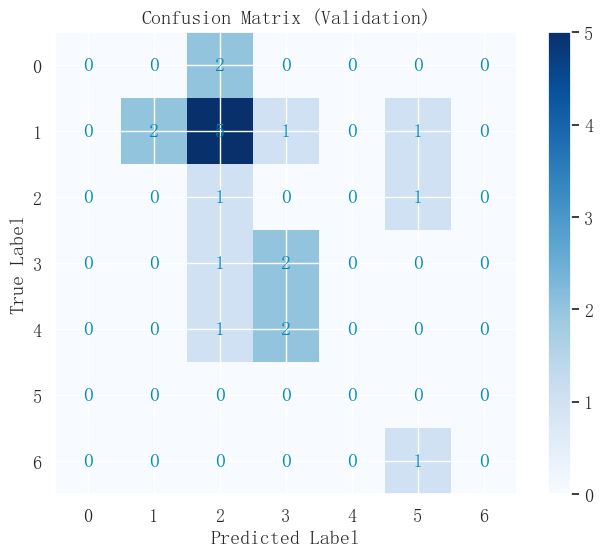

In [432]:
from sklearn.metrics import confusion_matrix

# 预测验证集
predictions_nn_valid = model.predict(X_valid_scaled)
predictions_nn_valid = np.argmax(predictions_nn_valid, axis=1)

# 计算混淆矩阵
confusion_valid = confusion_matrix(y_valid, predictions_nn_valid)

# 打印混淆矩阵
print('Confusion Matrix (Validation):')
print(confusion_valid)

# 绘制热力图，使用不同的颜色映射
plt.figure(figsize=(8, 6))
plt.imshow(confusion_valid, interpolation='nearest', cmap=plt.cm.Blues)  # 使用红色映射 (cmap=plt.cm.Reds)
plt.title('Confusion Matrix (Validation)')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# 在热力图上添加数值
for i in range(confusion_valid.shape[0]):
    for j in range(confusion_valid.shape[1]):
        plt.text(j, i, str(confusion_valid[i, j]), horizontalalignment='center', verticalalignment='center', color='#0089BA')

plt.savefig('./figs/Q3/3a_hunxiao.png',dmi=400)
plt.show()


In [434]:
import numpy as np

# 从混淆矩阵中提取真正例、真负例、假正例和假负例
TN = confusion_valid[0, 0]
FP = confusion_valid[0, 1:].sum()
FN = confusion_valid[1:, 0].sum()
TP = confusion_valid[1:, 1:].sum()

# 计算准确率
accuracy = (TP + TN) / (TP + TN + FP + FN)

# 计算召回率
recall = TP / (TP + FN)

# 计算精确度
precision = TP / (TP + FP)

print(f"准确率: {accuracy:.2f}")
print(f"召回率: {recall:.2f}")
print(f"精确度: {precision:.2f}")


准确率: 0.90
召回率: 1.00
精确度: 0.90


In [394]:
# 假设你有新的原始数据，存储在变量 new_data 中


# 如果有独热编码的需求，也要对 new_data 进行相同的处理

# 使用模型进行预测，得到每个样本的类别标签
new_predictions = model.predict(X_scaled)
new_predictions_nn = np.argmax(new_predictions, axis=1)


4/4 [==============================] - 0s 0s/step


In [395]:
table['bp神经网络预测的mRS'] = pd.DataFrame(new_predictions_nn)

C:\Users\wwx\AppData\Local\Temp\ipykernel_47236\703381381.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table['bp神经网络预测的mRS'] = pd.DataFrame(new_predictions_nn)


In [396]:
table

,ID,HM_volume,ED_volume,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,original_shape_SurfaceArea,original_shape_VoxelVolume,NCCT_original_firstorder_Energy,90天mRS,bp神经网络预测的mRS
0,sub001,69714,48919,28.776261,79.361352,60.016664,68.007353,67.779053,74.148500,16795.208333,60.115094,12328.452469,17136,5.030735e+07,4.0,2
1,sub002,47500,23526,25.505005,55.711193,57.982756,52.478567,55.758407,63.765194,9128.250000,50.752649,7213.155855,9347,1.346762e+07,0.0,0
2,sub003,86396,32621,32.302338,78.031463,69.115845,88.836929,70.405966,89.409172,11952.375000,69.434088,10296.788172,12241,1.625828e+07,5.0,5
3,sub004,45498,22191,22.553405,80.530949,48.373546,57.870545,65.000000,72.945185,8590.833333,36.900531,6706.913313,8789,9.115515e+06,4.0,4
4,sub005,14832,47392,36.704810,110.528262,102.883429,109.329776,112.805142,118.785521,21773.833333,68.857570,16362.521151,22302,5.016653e+07,3.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,sub096,9114,5951,17.251933,40.797156,36.055513,40.459857,33.376639,42.426407,1718.875000,27.869528,2018.321313,1830,3.776482e+06,4.0,4
96,sub097,10806,10227,16.571583,42.099215,34.713110,41.773197,41.194660,43.011626,3044.875000,31.667490,2782.714802,3122,7.998654e+06,2.0,2
97,sub098,188134,39868,28.036988,116.037899,77.698134,123.422040,96.005208,123.422040,14108.000000,73.607651,12665.452494,14498,2.049408e+07,5.0,5
98,sub099,37309,9653,17.527187,78.046160,46.065171,56.612719,76.661594,78.651128,2822.083333,44.528260,3688.165052,3008,5.243784e+06,3.0,3


In [397]:
table1 = pd.read_excel('../data/表1-患者列表及临床信息.xlsx')
table2 = pd.read_excel('../data/表2-患者影像信息血肿及水肿的体积及位置.xlsx')
table3 = pd.read_excel('../data/lwj/2c_new.xlsx')

table_temp = pd.merge(table1, table2, on='ID')
table_d = pd.merge(table_temp, table3, on='ID')

In [398]:
table_d

,ID,90天mRS,数据集划分,入院首次影像检查流水号_x,年龄,性别,脑出血前mRS评分,高血压病史,卒中病史,糖尿病史,...,NCCT_original_firstorder_MeanAbsoluteDeviation,NCCT_original_firstorder_Mean,NCCT_original_firstorder_Median,NCCT_original_firstorder_Minimum,NCCT_original_firstorder_Range,NCCT_original_firstorder_RobustMeanAbsoluteDeviation,NCCT_original_firstorder_RootMeanSquared,NCCT_original_firstorder_Skewness,NCCT_original_firstorder_Uniformity,NCCT_original_firstorder_Variance
0,sub001,4.0,训练,20161212002136,43,女,0,0,0,0,...,8.247517,53.100174,54.277975,2.630186,88.333203,5.421960,54.182743,-0.680312,0.156607,116.141179
1,sub002,0.0,训练,20160406002131,58,男,0,1,0,0,...,5.767857,37.252825,37.518627,11.670399,54.126259,3.986374,37.958520,-0.176969,0.132046,53.076248
2,sub003,5.0,训练,20160413000006,78,男,0,1,0,0,...,7.659346,35.163065,35.410096,-1.715890,70.139106,5.382112,36.444232,-0.057096,0.128060,91.740851
3,sub004,4.0,训练,20161215001667,70,男,2,1,1,0,...,8.911068,30.191045,30.926762,-20.991359,92.048538,6.191501,32.204819,-0.297133,0.145292,125.651157
4,sub005,3.0,训练,20161222000978,51,男,0,0,0,0,...,9.250453,45.985845,46.492200,-9.889141,96.821808,6.482624,47.428035,-0.227378,0.146488,134.720581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,sub156,NaN,测试2,20200306000927,87,女,0,1,0,0,...,10.403959,30.983828,31.471558,-19.978141,111.297179,7.310788,33.601480,-0.068704,0.151482,169.061898
156,sub157,NaN,测试2,20201009003102,52,男,2,1,1,0,...,3.651153,48.347970,48.533011,30.460776,29.788433,2.260258,48.602582,-0.239727,0.125220,24.684739
157,sub158,NaN,测试2,20200410001952,57,男,0,1,0,0,...,6.783101,53.006514,53.345998,20.456862,65.707611,4.718427,53.690717,-0.079589,0.136352,73.002568
158,sub159,NaN,测试2,20200218000582,47,男,0,1,0,0,...,8.423220,36.981876,37.092745,-5.551496,72.713624,5.802628,38.494810,-0.202350,0.120587,114.191236


In [399]:
input_fea = table_d[['年龄','糖尿病史','冠心病史','吸烟史','饮酒史','HM_volume', 'ED_volume', 'ED_PCA_R_Ratio', 'original_shape_Maximum2DDiameterColumn', 'original_shape_MeshVolume', 'original_shape_SurfaceArea', 'original_shape_SurfaceVolumeRatio', 'original_shape_VoxelVolume', 'NCCT_original_firstorder_Entropy', 'NCCT_original_firstorder_Minimum', 'NCCT_original_firstorder_Range', 'NCCT_original_firstorder_Uniformity', 'NCCT_original_firstorder_Energy']]

X_ = pd.get_dummies(input_fea)

X_

,年龄,糖尿病史,冠心病史,吸烟史,饮酒史,HM_volume,ED_volume,ED_PCA_R_Ratio,original_shape_Maximum2DDiameterColumn,original_shape_MeshVolume,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,original_shape_VoxelVolume,NCCT_original_firstorder_Entropy,NCCT_original_firstorder_Minimum,NCCT_original_firstorder_Range,NCCT_original_firstorder_Uniformity,NCCT_original_firstorder_Energy
0,43,0,0,0,0,69714,48919,0.136511,60.016664,16795.208333,12328.452469,0.734046,17136.0,2.971570,2.630186,88.333203,0.156607,5.030735e+07
1,58,0,0,0,0,47500,23526,0.246876,57.982756,9128.250000,7213.155855,0.790201,9347.0,3.156185,11.670399,54.126259,0.132046,1.346762e+07
2,78,0,0,0,0,86396,32621,0.075013,69.115845,11952.375000,10296.788172,0.861485,12241.0,3.183489,-1.715890,70.139106,0.128060,1.625828e+07
3,70,0,0,0,0,45498,22191,0.012483,48.373546,8590.833333,6706.913313,0.780706,8789.0,3.013699,-20.991359,92.048538,0.145292,9.115515e+06
4,51,0,0,0,0,14832,47392,0.011690,102.883429,21773.833333,16362.521151,0.751476,22302.0,2.995498,-9.889141,96.821808,0.146488,5.016653e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,87,0,1,0,0,32559,8968,0.000000,40.249224,2601.000000,3189.186780,1.226139,2773.0,2.953294,-19.978141,111.297179,0.151482,3.130882e+06
156,52,0,0,1,0,18150,409,0.000000,32.310989,51.000000,136.960699,2.685504,63.0,3.195081,30.460776,29.788433,0.125220,1.488193e+05
157,57,0,0,0,0,27969,17948,0.160686,43.931765,6078.416667,5208.860220,0.856944,6257.0,3.109671,20.456862,65.707611,0.136352,1.803701e+07
158,47,0,0,1,1,53154,14430,0.000000,59.059292,4941.166667,5488.454400,1.110761,5213.0,3.281100,-5.551496,72.713624,0.120587,7.724886e+06


In [402]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_)
probabilities = model.predict(X_scaled)
# 获取模型的预测结果
predictions_nn = np.argmax(probabilities, axis=1)



Q3_result = predictions_nn
pd.DataFrame(Q3_result).to_excel('./result/Q3_result.xlsx',index=False)
Q3_result

5/5 [==============================] - 0s 0s/step


array([2, 0, 5, 4, 2, 5, 2, 3, 3, 3, 2, 0, 2, 3, 2, 5, 3, 3, 3, 2, 3, 2,
       2, 1, 3, 3, 5, 4, 4, 5, 3, 1, 2, 3, 5, 3, 4, 2, 1, 1, 3, 4, 5, 3,
       2, 5, 1, 1, 1, 1, 0, 3, 2, 3, 3, 0, 5, 5, 0, 4, 4, 5, 2, 3, 3, 6,
       3, 2, 6, 0, 5, 5, 1, 2, 3, 5, 5, 2, 2, 1, 3, 2, 5, 1, 2, 0, 1, 2,
       2, 3, 2, 5, 1, 2, 3, 4, 2, 5, 3, 2, 0, 2, 1, 2, 1, 5, 3, 3, 5, 2,
       5, 2, 3, 6, 5, 2, 3, 5, 2, 0, 0, 1, 2, 2, 4, 1, 2, 2, 5, 6, 3, 5,
       2, 3, 3, 2, 3, 2, 3, 2, 3, 2, 6, 5, 2, 2, 4, 1, 3, 2, 4, 6, 5, 1,
       2, 5, 1, 2, 1, 5], dtype=int64)